In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

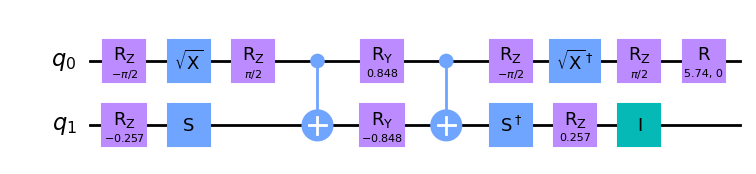

In [9]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))


In [4]:
QuantumCircuit.draw()

Traceback (most recent call last):
  Cell In[4], line 1
    QuantumCircuit.draw()
TypeError: QuantumCircuit.draw() missing 1 required positional argument: 'self'

Use %tb to get the full traceback.


>>> Observable: ['XZ']


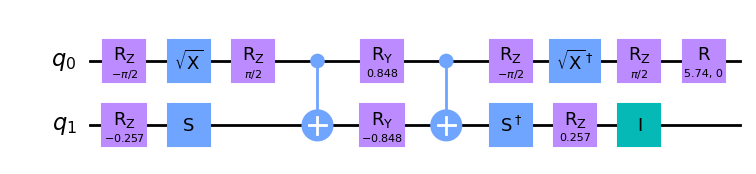

In [10]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("XZ")
print(f">>> Observable: {observable.paulis}")
display(circuit.draw("mpl"))

In [11]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("XZ")
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['XZ']


In [12]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [13]:
job = estimator.run(circuit, observable)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: 0e649b7f-6bf4-41ed-b6af-61870d9c6ee7
>>> Job Status: JobStatus.DONE


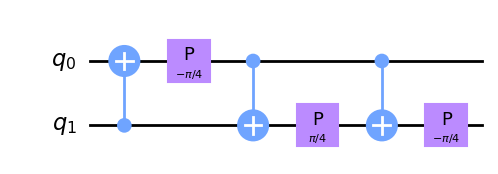

>>> Observable: ['IY']
>>> Expectation value: 0.0


In [14]:
circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
observable = SparsePauliOp("IY")

job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Expectation value: {result.values[0]}")

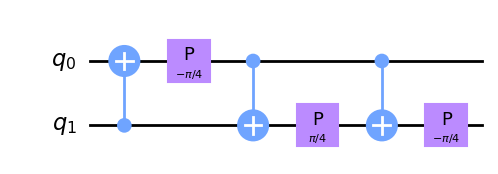

>>> Observable: ['IY']
>>> Expectation value: 0.0


In [14]:
circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
observable = SparsePauliOp("IY")

job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Expectation value: {result.values[0]}")

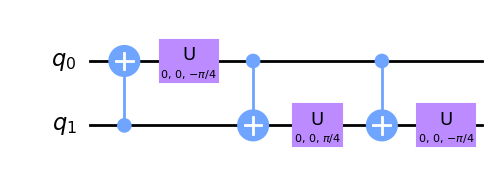

>>> Observable: ['IY']
>>> Expectation value: 0.0


In [19]:
circuit = random_circuit(2, 2, seed=1).decompose(reps=3)
observable = SparsePauliOp("IY")

job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Expectation value: {result.values[0]}")

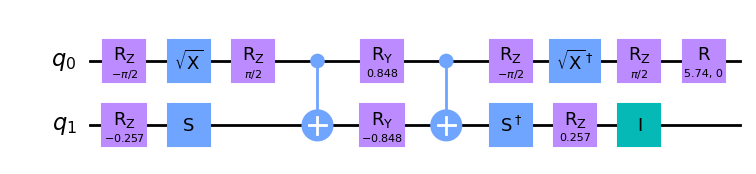

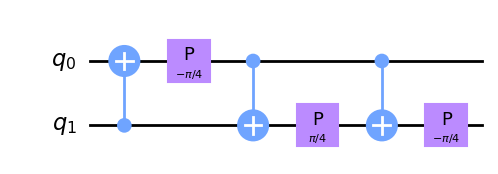

>>> Observables: [PauliList(['XZ']), PauliList(['IY'])]
>>> Expectation values: [0.5000646622430736, 0.0]


In [20]:
circuits = (
    random_circuit(2, 2, seed=0).decompose(reps=1),
    random_circuit(2, 2, seed=1).decompose(reps=1),
)
observables = (
    SparsePauliOp("XZ"),
    SparsePauliOp("IY"),
)

job = estimator.run(circuits, observables)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f">>> Observables: {[obs.paulis for obs in observables]}")
print(f">>> Expectation values: {result.values.tolist()}")

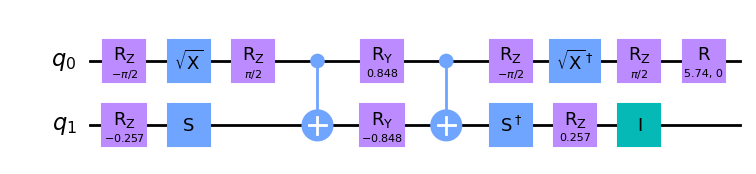

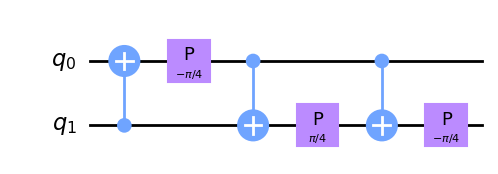

>>> Observables: [PauliList(['XZ']), PauliList(['IY'])]
>>> Expectation values: [0.5000646622430736, 0.0]


In [23]:
circuits = (
    random_circuit(2, 2, seed=0).decompose(reps=1),
    random_circuit(2, 2, seed=1).decompose(reps=1),
)
observables = (
    SparsePauliOp("XZ"),
    SparsePauliOp("IY"),
)

job = estimator.run(circuits, observables)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f">>> Observables: {[obs.paulis for obs in observables]}")
print(f">>> Expectation values: {result.values.tolist()}")

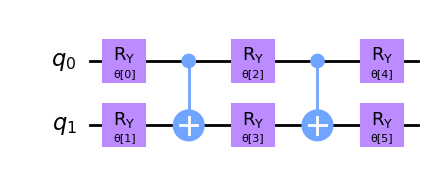

>>> Observable: ['ZI']
>>> Parameter values: [0, 1, 2, 3, 4, 5]
>>> Expectation value: -0.6485568434766463


In [24]:
from qiskit.circuit.library import RealAmplitudes

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
observable = SparsePauliOp("ZI")
parameter_values = [0, 1, 2, 3, 4, 5]

job = estimator.run(circuit, observable, parameter_values)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Parameter values: {parameter_values}")
print(f">>> Expectation value: {result.values[0]}")

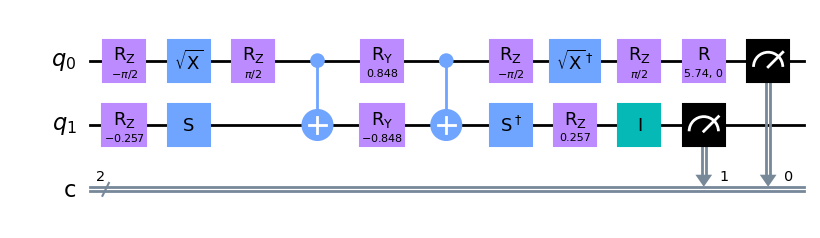

In [25]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0, measure=True).decompose(reps=1)
display(circuit.draw("mpl"))

In [26]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [27]:
job = sampler.run(circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: f5ab09c8-876c-4e7c-b19a-c8a529362d11
>>> Job Status: JobStatus.DONE


In [28]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-distribution: {result.quasi_dists[0]}")

>>> SamplerResult(quasi_dists=[{0: 0.4059100518225088, 1: 0.0320881623296046, 2: 0.0411727809637867, 3: 0.5208290048841}], metadata=[{}])
  > Quasi-distribution: {0: 0.4059100518225088, 1: 0.0320881623296046, 2: 0.0411727809637867, 3: 0.5208290048841}


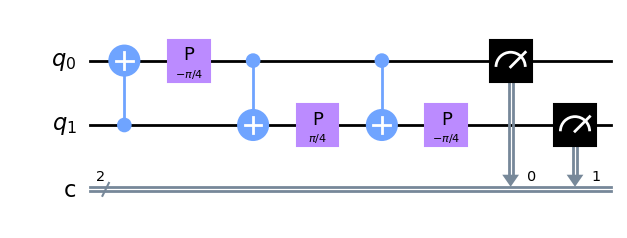

>>> Quasi-distribution: {0: 1.0}


In [29]:
circuit = random_circuit(2, 2, seed=1, measure=True).decompose(reps=1)

job = sampler.run(circuit)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Quasi-distribution: {result.quasi_dists[0]}")

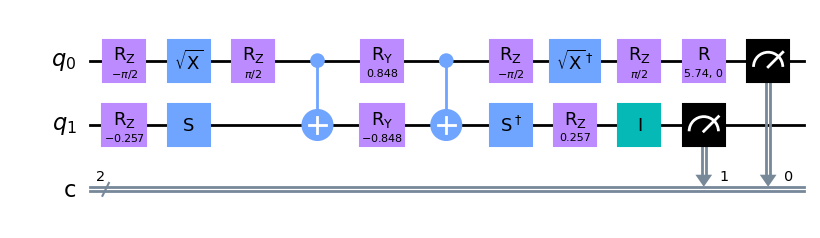

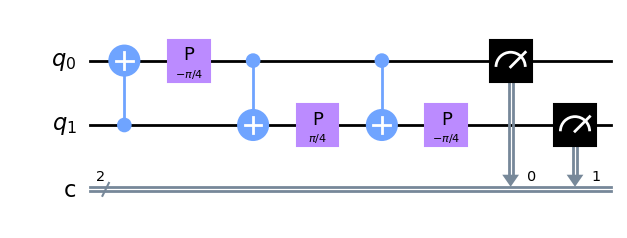

>>> Quasi-distribution: [{0: 0.4059100518225088, 1: 0.0320881623296046, 2: 0.0411727809637867, 3: 0.5208290048841}, {0: 1.0}]


In [30]:
circuits = (
    random_circuit(2, 2, seed=0, measure=True).decompose(reps=1),
    random_circuit(2, 2, seed=1, measure=True).decompose(reps=1),
)

job = sampler.run(circuits)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f">>> Quasi-distribution: {result.quasi_dists}")

In [31]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibmq_qasm_simulator")

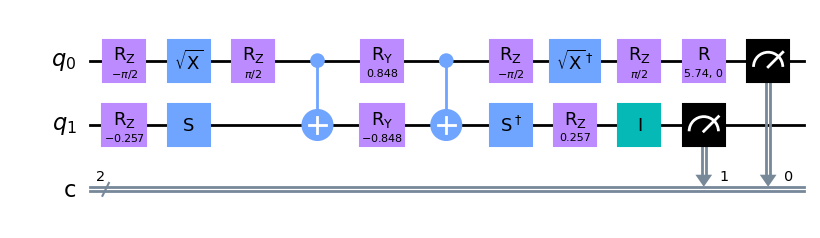

In [32]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0, measure=True).decompose(reps=1)
display(circuit.draw("mpl"))

In [33]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(session=backend)

In [34]:
job = sampler.run(circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cgj2sb2q8fd0otj6fu9g
>>> Job Status: JobStatus.RUNNING


In [35]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> SamplerResult(quasi_dists=[{1: 0.02875, 2: 0.034, 0: 0.41175, 3: 0.5255}], metadata=[{'shots': 4000}])
  > Quasi-distribution: {1: 0.02875, 2: 0.034, 0: 0.41175, 3: 0.5255}
  > Metadata: {'shots': 4000}


In [36]:
from qiskit_ibm_runtime import Options

options = Options(optimization_level=3, environment={"log_level": "INFO"})

In [37]:
from qiskit_ibm_runtime import Options

options = Options()
options.resilience_level = 1
options.execution.shots = 2048

In [38]:
sampler = Sampler(session=backend, options=options)
result = sampler.run(circuit).result()
print(f">>> Metadata: {result.metadata[0]}")

>>> Metadata: {'shots': 2048, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.06169776400201954}


In [39]:
sampler = Sampler(session=backend, options=options)
result = sampler.run(circuit, shots=1024).result()
print(f">>> Metadata: {result.metadata[0]}")

>>> Metadata: {'shots': 1024, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.04530702699776157}


In [40]:
from qiskit_ibm_runtime import Session, Estimator

with Session(backend=backend, max_time="1h"):
    sampler = Sampler()

    result = sampler.run(circuit).result()
    print(f">>> Quasi-distribution from the first run: {result.quasi_dists[0]}")

    result = sampler.run(circuit).result()
    print(f">>> Quasi-distribution from the second run: {result.quasi_dists[0]}")

>>> Quasi-distribution from the first run: {1: 0.028, 3: 0.52225, 2: 0.045, 0: 0.40475}
>>> Quasi-distribution from the second run: {1: 0.033, 3: 0.51775, 2: 0.0455, 0: 0.40375}


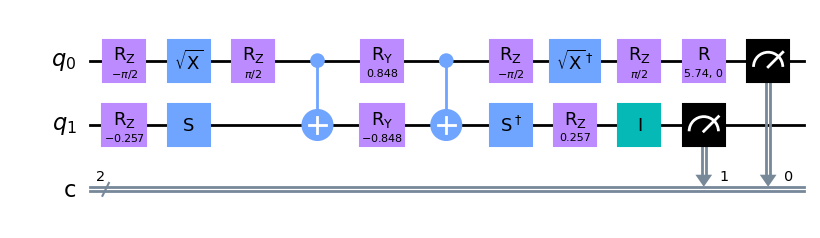

In [42]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0, measure=True).decompose(reps=1)
display(circuit.draw("mpl"))

In [43]:
import numpy as np
import torch
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.neural_networks import TwoLayerQNN, SamplerQNN, EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.datasets import iris
from qiskit.circuit.library import RealAmplitudes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Load Iris dataset
data, target = iris(return_X_y=True)

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Convert target labels to binary classes
encoder = LabelEncoder()
target = encoder.fit_transform(target)

# Split data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the quantum instance using the Aer qasm_simulator
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=42, seed_transpiler=42)

# Define the feature map
feature_map = RealAmplitudes(num_qubits=4, entanglement='linear', reps=1)

# Define the ansatz
ansatz = RealAmplitudes(num_qubits=4, entanglement='linear', reps=1)

# Create the SamplerQNN
sampler_qnn = SamplerQNN(feature_map, ansatz, quantum_instance=quantum_instance)

# Create the EstimatorQNN
estimator_qnn = EstimatorQNN(feature_map, ansatz, quantum_instance=quantum_instance)

class CustomQNN(TwoLayerQNN):
    def __init__(self, sampler_qnn, estimator_qnn):
        super().__init__(sampler_qnn.num_qubits, sampler_qnn.output_shape, sampler_qnn.sparse, sampler_qnn.quantum_instance)
        self.sampler_qnn = sampler_qnn
        self.estimator_qnn = estimator_qnn

    def forward(self, input_data):
        # Pass input_data through the sampler_qnn
        sampler_output = self.sampler_qnn.forward(input_data)
        
        # Pass the sampler_output through the estimator_qnn
        estimator_output = self.estimator_qnn.forward(sampler_output)
        return estimator_output

# Instantiate the custom QNN
custom_qnn = CustomQNN(sampler_qnn, estimator_qnn)

# Define the NeuralNetworkClassifier with the custom QNN
model = NeuralNetworkClassifier(custom_qnn, optimizer=torch.optim.Adam(custom_qnn.parameters(), lr=0.1))

# Train the model
model.fit(data_train, target_train, epochs=10, batch_size=10)

# Test the model
target_predicted = model.predict(data_test)

# Evaluate the model
print("Classification Report:\n", classification_report(target_test, target_predicted))


Traceback (most recent call last):
  Cell In[43], line 14
    data, target = iris(return_X_y=True)
  File /opt/conda/lib/python3.10/site-packages/qiskit_machine_learning/deprecation.py:363 in wrapper
    return func(*args, **kwargs)
TypeError: iris() got an unexpected keyword argument 'return_X_y'

Use %tb to get the full traceback.


/tmp/ipykernel_60/3231571787.py:14: DeprecationWarning: The iris function is deprecated as of version 0.4.0 and will be removed no sooner than 3 months after the release.
  data, target = iris(return_X_y=True)


In [2]:
from qiskit_ibm_runtime import Sampler
from qiskit_ibm_runtime import Options
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-asu/main/pi-deluca',
)
backend = service.backend('simulator_statevector')
options = Options()
options.execution.shots = 1024
sampler = Sampler(session=backend, options=options)

# Set up the sampler qnn
qnn = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=interpret_measurement,
    output_shape=3,
    sampler=sampler
)

/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:448: UserWarning: Default hub/group/project ibm-q-asu/main/pi-deluca not found for the account and is ignored.
  warnings.warn(


Traceback (most recent call last):
  Cell In[2], line 15
    qnn = SamplerQNN(
NameError: name 'SamplerQNN' is not defined

Use %tb to get the full traceback.
